In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu

In [2]:
df = pd.read_excel('train.xlsx')

In [3]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [4]:
df

,ID,Order Date,Class,Region,Sub-Category,Sales
0,646,2018-12-30,Стандарт,Урал,Appliances,37229.080
1,907,2018-12-30,Стандарт,Владивосток,Bookcases,20994.610
2,908,2018-12-30,Стандарт,Владивосток,Phones,42133.860
3,909,2018-12-30,Стандарт,Владивосток,Binders,10612.000
4,1297,2018-12-30,Стандарт,Калиниград,Binders,28781.130
...,...,...,...,...,...,...
9795,1760,2015-01-05,Стандарт,Владивосток,Art,8639.472
9796,740,2015-01-04,Стандарт,Урал,Labels,15246.050
9797,741,2015-01-04,Стандарт,Урал,Storage,20415.810
9798,742,2015-01-04,Стандарт,Урал,Binders,4559.085


Задание 1
 а) Какие подгруппы товаров наиболее часто покупают за все время продаж (минимум 4 группы)?
 б) Какие подгруппы товаров наиболее часто покупают за последние два года (минимум 4 группы)?
 в) Какие подгруппы товаров наиболее часто покупают за последний год(минимум 4 группы)?

 Подгруппа – Sub-Category
 Дата – Order_date
 Сделать вывод на основе полученных результатов.

а) Какие подгруппы товаров наиболее часто покупают за все время продаж (минимум 4 группы)?

In [5]:
buy_all = df.groupby(('Sub-Category')).agg(cnt_all = ('ID','count')).reset_index().sort_values('cnt_all', ascending=False).head(4)
buy_all

б) Какие подгруппы товаров наиболее часто покупают за последние два года (минимум 4 группы)?

In [6]:
df['year'] = df['Order Date'].dt.year


In [7]:
buy_two = df[df['year'] >=2016].groupby(('Sub-Category')).agg(cnt_all = ('ID','count')).reset_index().sort_values('cnt_all', ascending=False).head(4)
buy_two

 в) Какие подгруппы товаров наиболее часто покупают за последний год(минимум 4 группы)?

In [8]:
buy_one = df[df['year'] >=2017].groupby(('Sub-Category')).agg(cnt_all = ('ID','count')).reset_index().sort_values('cnt_all', ascending=False).head(4)
buy_one

,Sub-Category,cnt_all
3,Binders,900
12,Paper,809
9,Furnishings,557
13,Phones,510


## Вывод: За каждый период популярны одни и те же категории товаров, это показывает на их стабильный спрос у покупателя.\
Однако видим, что за последний год выросло кол-во покупок в сравнении за предыдущие периоды, это говорит о том, что возросла покупательская способность клиентов.
Возможно с увеличением вакансий на удаленный режим работы повело за собой увеличение спроса на офисные принадлежности.
Возможно с 2017 - 2018 что то произошло, что заставило людей работать дома, что сказалось на увеличении спроса на офисные принадлежности 


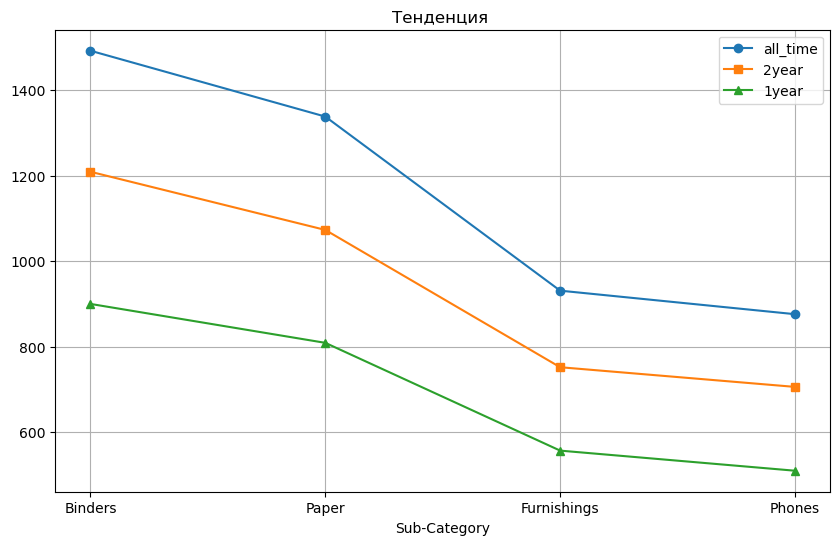

In [9]:

plt.figure(figsize=(10, 6))

plt.plot(buy_all['Sub-Category'], buy_all['cnt_all'], label='all_time', marker='o')
plt.plot(buy_two['Sub-Category'], buy_two['cnt_all'], label='2year', marker='s')
plt.plot(buy_one['Sub-Category'], buy_one['cnt_all'], label='1year', marker='^')


plt.title('Тенденция ')
plt.xlabel('Sub-Category')



plt.legend()


plt.grid()
plt.show()

 Задание 2
 Построить boxplot («Ящик с усами») на основе продаж (Sales). Найти мажоритарную черту (т.е. избавиться от аномалий и представить четкую картину распределения величин).
 Можно использовать правило трех сигм. Однако любые другие решения приветствуются.


In [22]:
df

,ID,Order Date,Class,Region,Sub-Category,Sales,year,Sale_group
0,646,2018-12-30,Стандарт,Урал,Appliances,37229.080,2018,max
1,907,2018-12-30,Стандарт,Владивосток,Bookcases,20994.610,2018,medium
2,908,2018-12-30,Стандарт,Владивосток,Phones,42133.860,2018,ex_max
3,909,2018-12-30,Стандарт,Владивосток,Binders,10612.000,2018,min
4,1297,2018-12-30,Стандарт,Калиниград,Binders,28781.130,2018,medium
...,...,...,...,...,...,...,...,...
9795,1760,2015-01-05,Стандарт,Владивосток,Art,8639.472,2015,ex_min
9796,740,2015-01-04,Стандарт,Урал,Labels,15246.050,2015,min
9797,741,2015-01-04,Стандарт,Урал,Storage,20415.810,2015,medium
9798,742,2015-01-04,Стандарт,Урал,Binders,4559.085,2015,ex_min


<Axes: xlabel='Sales'>

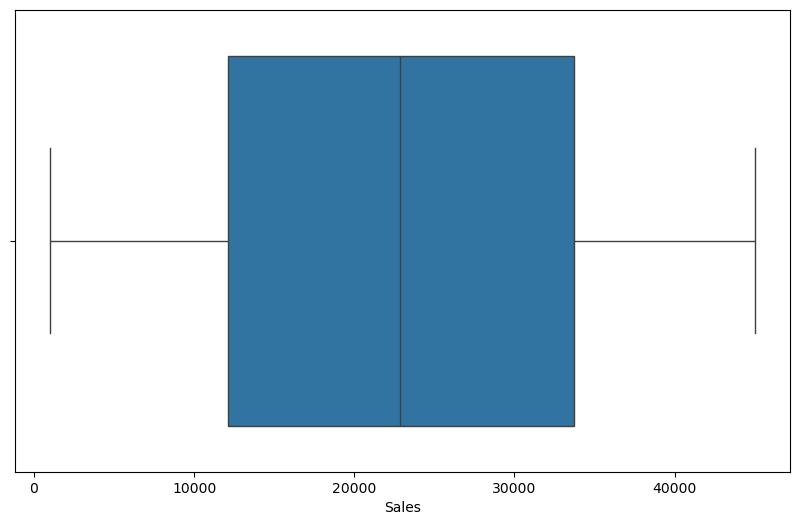

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(data = df , x='Sales' )

In [26]:
mean_sales = df['Sales'].mean()
std_sales = df['Sales'].std()


In [31]:
upper_sig = mean_sales + 3 * std_sales
lower_sig = mean_sales - 3 * std_sales


60727.75718226239

In [32]:
df_sig = df[(df['Sales'] >= lower_sig) & (df['Sales'] <= upper_sig)]


<Axes: xlabel='Sales'>

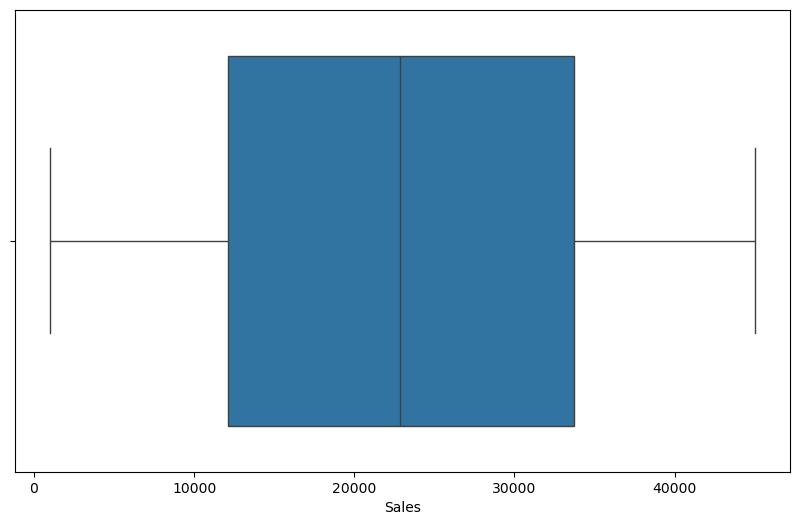

In [33]:
plt.figure(figsize=(10, 6))
sns.boxplot(data = df_sig , x='Sales' )

In [50]:
qwnt1 = df['Sales'].quantile(0.25)
qwnt2 = df['Sales'].quantile(0.75)
shar = qwnt2 - qwnt2
shar

0.0

In [52]:
upper_qwant = qwnt2 + 1.5 * shar
lower_qwant = qwnt1 - 1.5 * shar
lower_qwant

12135.625

In [53]:
upper_qwant

33730.13

In [54]:
print(df['Sales'].describe())

count     9800.000000
mean     22921.757737
std      12601.999815
min       1002.794000
25%      12135.625000
50%      22882.060000
75%      33730.130000
max      44995.410000
Name: Sales, dtype: float64


In [55]:
df_qwant = df[(df['Sales'] >= lower_qwant) & (df['Sales'] <= upper_qwant)]
df_qwant

,ID,Order Date,Class,Region,Sub-Category,Sales,year,Sale_group
1,907,2018-12-30,Стандарт,Владивосток,Bookcases,20994.61,2018,medium
4,1297,2018-12-30,Стандарт,Калиниград,Binders,28781.13,2018,medium
9,2875,2018-12-29,Первый класс,Владивосток,Fasteners,26200.09,2018,medium
10,4240,2018-12-29,Стандарт,Урал,Paper,14612.86,2018,min
14,7633,2018-12-29,Второй класс,Москва,Chairs,23831.50,2018,medium
...,...,...,...,...,...,...,...,...
9790,7477,2015-01-06,Стандарт,Москва,Art,15681.76,2015,min
9793,7480,2015-01-06,Стандарт,Москва,Fasteners,19856.51,2015,min
9794,7481,2015-01-06,Стандарт,Москва,Paper,31250.09,2015,max
9796,740,2015-01-04,Стандарт,Урал,Labels,15246.05,2015,min


<Axes: xlabel='Sales'>

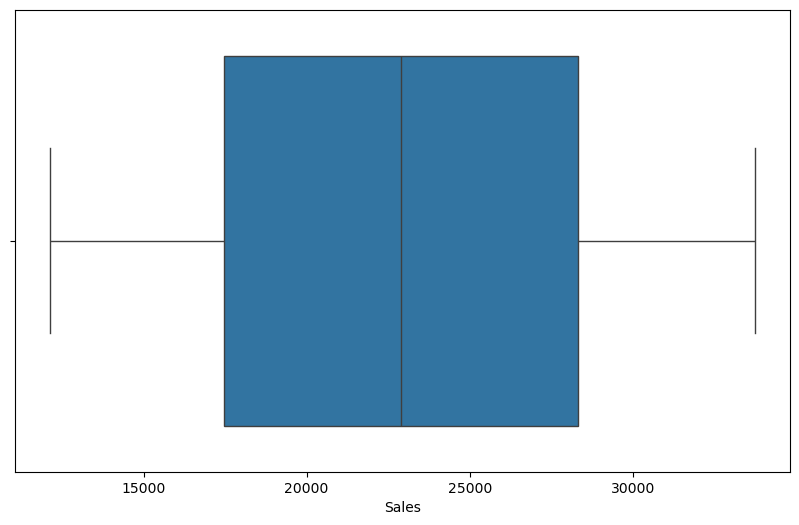

In [56]:
plt.figure(figsize=(10, 6))
sns.boxplot(data = df_qwant , x='Sales' )

Задание 3
 Для этого задания необходимо разбить все покупки на энное количество групп “Sale_group” (Допустим маленькие продажи, средние и высокие) на основе Sales
Сгруппировать данные на основе региона и группы продаж (Region, Sale_group). Определить основные тенденции и паттерны. Выделить наиболее «прибыльную» группу.


In [10]:
df

,ID,Order Date,Class,Region,Sub-Category,Sales,year
0,646,2018-12-30,Стандарт,Урал,Appliances,37229.080,2018
1,907,2018-12-30,Стандарт,Владивосток,Bookcases,20994.610,2018
2,908,2018-12-30,Стандарт,Владивосток,Phones,42133.860,2018
3,909,2018-12-30,Стандарт,Владивосток,Binders,10612.000,2018
4,1297,2018-12-30,Стандарт,Калиниград,Binders,28781.130,2018
...,...,...,...,...,...,...,...
9795,1760,2015-01-05,Стандарт,Владивосток,Art,8639.472,2015
9796,740,2015-01-04,Стандарт,Урал,Labels,15246.050,2015
9797,741,2015-01-04,Стандарт,Урал,Storage,20415.810,2015
9798,742,2015-01-04,Стандарт,Урал,Binders,4559.085,2015


In [11]:
df['Sale_group'] = np.where(df['Sales'] <= 10000, 'ex_min' ,
                            np.where(df['Sales'] <= 20000, 'min',
                                     np.where(df['Sales'] <= 30000, 'medium',
                                              np.where(df['Sales'] <= 40000,'max', 'ex_max'))))
                                                       
df

,ID,Order Date,Class,Region,Sub-Category,Sales,year,Sale_group
0,646,2018-12-30,Стандарт,Урал,Appliances,37229.080,2018,max
1,907,2018-12-30,Стандарт,Владивосток,Bookcases,20994.610,2018,medium
2,908,2018-12-30,Стандарт,Владивосток,Phones,42133.860,2018,ex_max
3,909,2018-12-30,Стандарт,Владивосток,Binders,10612.000,2018,min
4,1297,2018-12-30,Стандарт,Калиниград,Binders,28781.130,2018,medium
...,...,...,...,...,...,...,...,...
9795,1760,2015-01-05,Стандарт,Владивосток,Art,8639.472,2015,ex_min
9796,740,2015-01-04,Стандарт,Урал,Labels,15246.050,2015,min
9797,741,2015-01-04,Стандарт,Урал,Storage,20415.810,2015,medium
9798,742,2015-01-04,Стандарт,Урал,Binders,4559.085,2015,ex_min


In [12]:
res_df = df.groupby(['Region','Sale_group']).agg (sum_sales = ('Sales','sum')).reset_index().sort_values('sum_sales',ascending= False)
res_df

,Region,Sale_group,sum_sales
7,Калиниград,max,2.325873e+07
2,Владивосток,max,2.252963e+07
8,Калиниград,medium,1.949141e+07
17,Урал,max,1.854371e+07
3,Владивосток,medium,1.551914e+07
5,Калиниград,ex_max,1.485597e+07
0,Владивосток,ex_max,1.352298e+07
12,Москва,max,1.318660e+07
18,Урал,medium,1.305911e+07
9,Калиниград,min,1.092432e+07


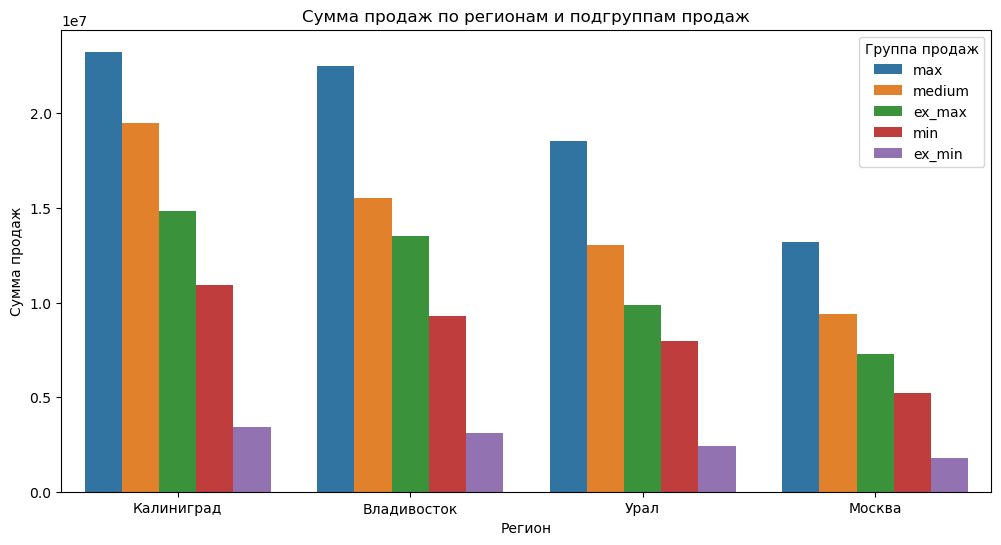

In [67]:
plt.figure(figsize=(12, 6))


sns.barplot(data=res_df, x='Region', y='sum_sales', hue='Sale_group')


plt.title('Сумма продаж по регионам и подгруппам продаж')
plt.xlabel('Регион')
plt.ylabel('Сумма продаж')
plt.legend(title='Группа продаж')



plt.show()

Наиболее "прибыльный" регион — это Калиниград, который занимает первые три позиции по суммарному объему продаж. В частности, он показывает наивысший уровень продаж в категории max
Владивосток также проявляет сильные результаты, особенно в категориях max и medium, но его максимальные продажи меньше, чем в Калиниграде.

В категории max самые высокие результаты у Калиниграда и Владивостока.

Наиболее прибыльной группой** является Калиниград, который показывает наивысшие значения как в максимальных, так и в средних продажах. Владивосток также демонстрирует высокий уровень продаж, но значительно уступает Калиниграду по максимальным параметрам. Урал, хотя и присутствует с несколькими записями, по-прежнему последует после лидеров.

Таким образом, рекомендуется фокусироваться на Калиниград как на ключевом регионе для увеличения продаж и маркетинга.